In [24]:
%load_ext autoreload
%autoreload 2
from feature_extractor import FeatureExtractor
from classifier import Classifier
from signal_manager import SignalMgr
from filter import Filter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

feaExtractor = FeatureExtractor()
classifier = Classifier()
sigMgr = SignalMgr()

# norm_signal = sigMgr.normalize_signals(signals)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os, sys

In [26]:
import os, sys
# signal_fpath = '/Users/changkong/ML/Signal Classification/testData/20180410现场测试/Data-0410-2/20180410_133005/Channel_1.csv'
# signal_fpath =  '/Users/changkong/ML/Signal Classification/testData/Data.20180426/良品测试/Data.20180426/20180426_151648/Channel_1.csv'
# signal_fpath = '/Users/changkong/ML/Signal Classification/testData/Data.20180426/不良品1欧姆测试/Data.20180426/20180426_153051/Channel_1.csv'
# signal_fpath = '/Users/changkong/ML/Signal Classification/testData/Data.20180516/Data.20180516.1/20180516_084029/Channel_1.csv'
# signal_fpath = '/Users/changkong/ML/Signal Classification/testData/1005_Data20180609/20180609_150211/Channel_1.csv'
signal_fpath = '/Users/changkong/ML/Signal Classification/testData/1005_0830重新标注文件_Data._20180609.0830/20180329_152742/Channel_1.csv'

In [27]:
%reload_ext autoreload
sigMgr.process(signal_fpath, request_param={'skip_row':[1], 'speed_upper_bound':[20000], 'speed_lower_bound':[0]})

{'reason': -1,
 'speed': 13000.488281249998,
 'speedResult': 0,
 'stat': 0,
 'waveResult': 0}

(0.0, 0.2)

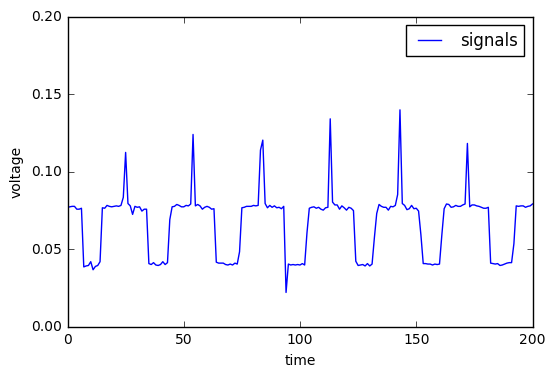

In [43]:
df_signals = pd.read_csv(signal_fpath, skiprows=1, header=None, names=['signals'])
ax = df_signals[100:301].reset_index(drop=True).plot()
ax.set_xlabel('time')
ax.set_ylabel('voltage')
ax.set_ylim(bottom=0.0, top=0.2)

(0.0, 0.2)

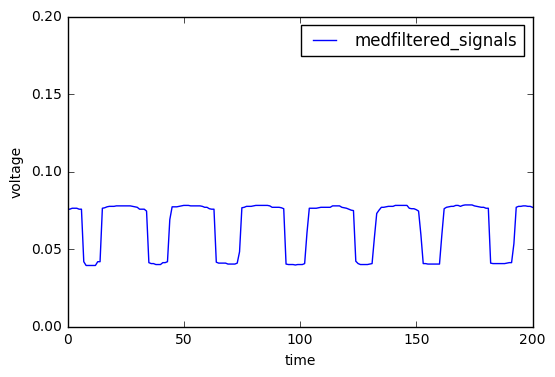

In [47]:
# 中值滤波之后的结果
medfilter = Filter.medfilter(df_signals['signals'][100:301], sigMgr.signalParams['PEAK_WINDOW_SIZE'])
df_med = pd.DataFrame({'medfiltered_signals':medfilter})
ax = df_med.plot()
ax.set_xlabel('time')
ax.set_ylabel('voltage')
ax.set_ylim(bottom=0.0, top=0.2)

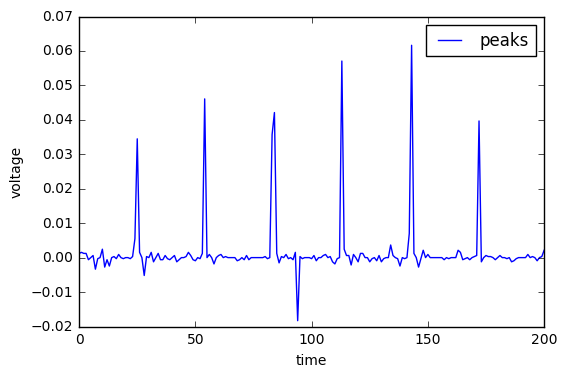

In [58]:
# 定位波形下拉须和上拉须的大小及长度， 原始波形减去中值滤波后的波形
new_df = pd.DataFrame()
new_df['peaks'] = df_signals['signals'][100:301].reset_index(drop=True) - df_med['medfiltered_signals']
ax = new_df.plot()
ax.set_xlabel('time')
ax.set_ylabel('voltage')

In [7]:
features = sigMgr.get_features(signal_fpath, request_param={'skip_row':[1]})
print features

{'peak_edge_ratio': 0.927536231884058, 'down_peaks': array([], dtype=int64), 'down_edges': [(16, 17), (41, 47), (77, 78), (106, 107), (130, 135), (163, 164), (193, 194), (223, 224), (246, 253), (281, 282), (310, 313), (341, 342), (367, 370), (398, 400), (429, 430), (459, 460), (486, 488), (516, 517), (546, 548), (576, 577), (604, 606), (634, 635), (662, 666), (694, 695), (722, 723), (752, 753), (782, 783), (812, 813), (836, 840), (869, 870), (899, 901), (929, 930), (956, 958), (987, 988), (1018, 1019)], 'max_down_peak_point': 0.021057129, 'paired_edge_height_diff': [0.1578947646533146, 0.15573767361939764, 0.14782602394651886, 0.14414413485478067, 0.10619473264529053, 0.10256408936246303, 0.09756094415435727, 0.09166662776226092, 0.08547005583973948, 0.08264458325210185, 0.08196718316519855, 0.06451613477826805, 0.05785125544132718, 0.052173922760683354, 0.05172418090778491, 0.0517240788380006, 0.04999999330676879, 0.04958676986500671, 0.04878051288956319, 0.042372900391550616, 0.03571

[ 0.5001645   0.47048047  0.48532248 ... -1.3550881  -1.325404
 -1.325404  ]


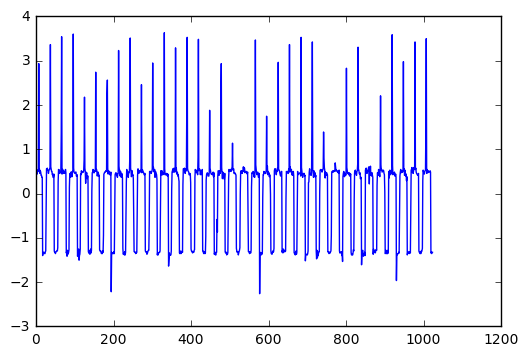

In [8]:
# 获取对应的edges

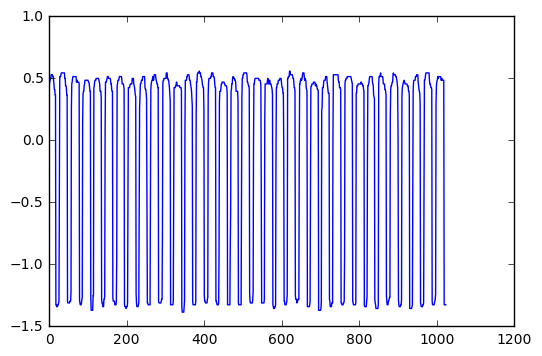

In [9]:
medfilter = Filter.medfilter(features['normalized_signals'], sigMgr.signalParams['PEAK_WINDOW_SIZE'])
plt.plot(medfilter)

0.4853224754333496
0.51500654


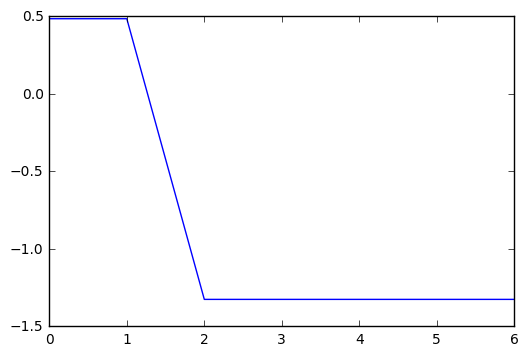

In [10]:
plt.plot(medfilter[1017:1025])
print medfilter[1017]
print features['normalized_signals'][1017]

In [11]:
classifier.getUpEdges_(features['normalized_signals'], sigMgr.signalParams)

[(25, 27),
 (55, 57),
 (85, 86),
 (112, 115),
 (140, 145),
 (173, 175),
 (202, 204),
 (231, 235),
 (260, 262),
 (291, 293),
 (320, 322),
 (349, 351),
 (378, 379),
 (409, 410),
 (437, 439),
 (466, 469),
 (495, 498),
 (525, 528),
 (555, 556),
 (584, 586),
 (613, 615),
 (644, 646),
 (673, 675),
 (701, 703),
 (731, 733),
 (761, 763),
 (791, 792),
 (820, 822),
 (849, 850),
 (879, 880),
 (909, 910),
 (937, 940),
 (966, 968),
 (997, 998)]

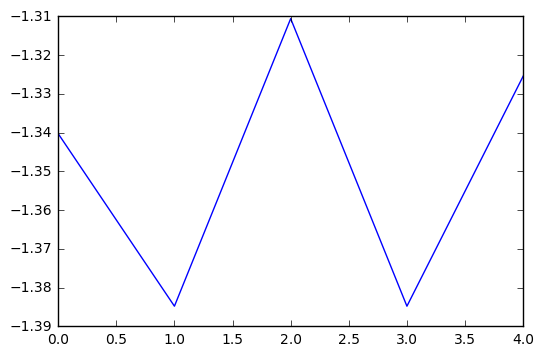

In [12]:
plt.plot(features['normalized_signals'][227:232])

In [13]:
classifier.getEdgeHeight_(medfilter[227:260], [(5, 10)])

[0.964731365442276]

In [14]:
peak_candidates = features['normalized_signals'] - Filter.medfilter(features['normalized_signals'], 9)

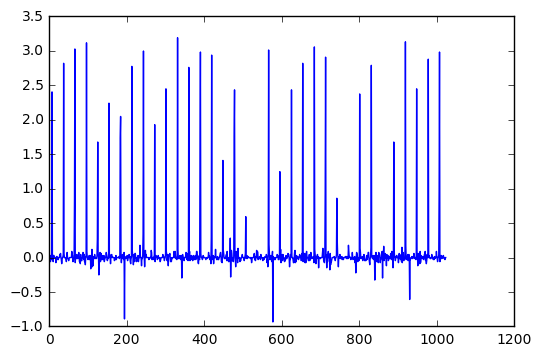

In [15]:
plt.plot(peak_candidates)

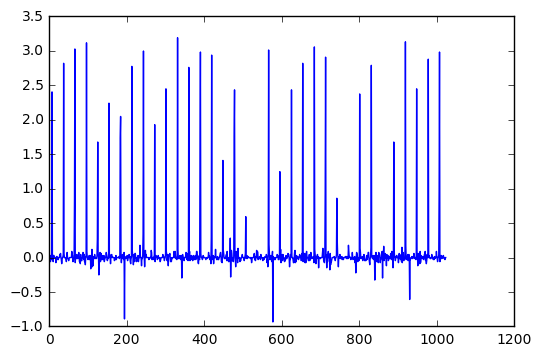

In [16]:
plt.plot(peak_candidates)